# FAANG stocks analyze
In this data project I will focus on exploratory data analysis of stock prices, and their price changings trough the Covid-19 until this day. I will display my visualization and pandas skills, In addition to my financial skills.

### Let's start!

#### First let's import our main laibraries 

In [71]:
from pandas_datareader import data as web, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Data

We need to get data using pandas datareader. We will get stock information for the following companies:
* META
* Apple
* Amazon
* Netflix 
* Nvidia
* Google

In [24]:
start = datetime.datetime(2020, 1, 15)
end = datetime.datetime(2022, 8, 30)

### Let's grab the stock's info using DataReader.

In [25]:
META = web.DataReader("META",'yahoo',start,end)
AAPL = web.DataReader("AAPL",'yahoo',start,end)
AMZN = web.DataReader("AMZN",'yahoo',start,end)
NFLX = web.DataReader("NFLX",'yahoo',start,end)
NVDA = web.DataReader("NVDA",'yahoo',start,end)
GOOG = web.DataReader("GOOG",'yahoo',start,end)
# Could also do this for a Panel Object 
df = data.DataReader(['META','AAPL', 'AMZN', 'NFLX', 'NVDA', 'GOOG'],'yahoo', start, end)

In [26]:
df.head()

Attributes   Adj Close                                               \
Symbols           META       AAPL       AMZN        NFLX       NVDA   
Date                                                                  
2020-01-15  221.149994  76.379692  93.100998  339.070007  61.214504   
2020-01-16  221.770004  77.336472  93.897003  338.619995  62.052067   
2020-01-17  222.139999  78.192657  93.236000  339.670013  62.139317   
2020-01-21  221.440002  77.662758  94.599998  338.109985  61.805286   
2020-01-22  221.320007  77.939972  94.373001  326.000000  62.346210   

Attributes                  Close                                    ...  \
Symbols          GOOG        META       AAPL       AMZN        NFLX  ...   
Date                                                                 ...   
2020-01-15  71.959999  221.149994  77.834999  93.100998  339.070007  ...   
2020-01-16  72.584999  221.770004  78.809998  93.897003  338.619995  ...   
2020-01-17  74.019501  222.139999  79.682503  93.236000  339.670013  ...   
2020-01-21  74.220001  221.440002  79.142502  94.599998  338.109985  ...   
2020-01-22  74.297501  221.320007  79.425003  94.373001  326.000000  ...   

Attributes       Open                                        Volume  \
Symbols          AMZN        NFLX       NVDA       GOOG        META   
Date                                                                  
2020-01-15  93.612503  338.679993  61.947498  71.510498  10036500.0   
2020-01-16  94.149498  343.500000  61.930000  72.372002  10015300.0   
2020-01-17  94.294502  341.000000  62.424999  73.145500  15905900.0   
2020-01-21  93.250000  340.000000  61.952499  73.956001  14275800.0   
2020-01-22  94.804497  332.549988  62.439999  74.550003  12212800.0   

Attributes                                                               
Symbols            AAPL        AMZN        NFLX        NVDA        GOOG  
Date                                                                     
2020-01-15  121923600.0  57932000.0   5158000.0  26310400.0  25654000.0  
2020-01-16  108829200.0  53190000.0   5016000.0  28419200.0  23474000.0  
2020-01-17  137816400.0  79946000.0   6066500.0  25379200.0  47924000.0  
2020-01-21  110843200.0  74156000.0  14350300.0  21791600.0  40734000.0  
2020-01-22  101832400.0  64326000.0  21730000.0  23924000.0  32216000.0  

[5 rows x 36 columns]

#### The second option is faster, but let's make a more comfortable DF.

I'll use pd.concat to concatenate the stocks dataframes together to a single dataframe.

In [33]:
tickers = ['META','AAPL','AMZN','NFLX','NVDA','GOOG']
faang_stocks = pd.concat([META,AAPL,AMZN,NFLX,NVDA,GOOG],axis=1,keys=tickers)

In [34]:
faang_stocks.columns.names=['Company Ticker','Stock Info']

In [35]:
faang_stocks.head()

Company Ticker        META                                                \
Stock Info            High         Low        Open       Close    Volume   
Date                                                                       
2020-01-15      221.679993  220.139999  220.610001  221.149994  10036500   
2020-01-16      222.630005  220.389999  222.570007  221.770004  10015300   
2020-01-17      222.289993  220.529999  222.029999  222.139999  15905900   
2020-01-21      222.369995  219.119995  222.160004  221.440002  14275800   
2020-01-22      222.750000  221.279999  222.309998  221.320007  12212800   

Company Ticker                   AAPL                                   ...  \
Stock Info       Adj Close       High        Low       Open      Close  ...   
Date                                                                    ...   
2020-01-15      221.149994  78.875000  77.387497  77.962502  77.834999  ...   
2020-01-16      221.770004  78.925003  78.022499  78.397499  78.809998  ...   
2020-01-17      222.139999  79.684998  78.750000  79.067497  79.682503  ...   
2020-01-21      221.440002  79.754997  79.000000  79.297501  79.142502  ...   
2020-01-22      221.320007  79.997498  79.327499  79.644997  79.425003  ...   

Company Ticker       NVDA                                         GOOG  \
Stock Info           Open      Close      Volume  Adj Close       High   
Date                                                                     
2020-01-15      61.947498  61.392502  26310400.0  61.214504  72.069748   
2020-01-16      61.930000  62.232498  28419200.0  62.052071  72.599503   
2020-01-17      62.424999  62.320000  25379200.0  62.139313  74.064751   
2020-01-21      61.952499  61.985001  21791600.0  61.805286  74.592499   
2020-01-22      62.439999  62.527500  23924000.0  62.346210  75.160698   

Company Ticker                                                          
Stock Info            Low       Open      Close      Volume  Adj Close  
Date                                                                    
2020-01-15      71.510498  71.510498  71.959999  25654000.0  71.959999  
2020-01-16      72.045998  72.372002  72.584999  23474000.0  72.584999  
2020-01-17      72.911003  73.145500  74.019501  47924000.0  74.019501  
2020-01-21      73.559998  73.956001  74.220001  40734000.0  74.220001  
2020-01-22      74.246498  74.550003  74.297501  32216000.0  74.297501  

[5 rows x 36 columns]

### Now it's time to explore the data !

let's find out the min & max close price for our stocks !

In [36]:
faang_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Company Ticker
META    382.179993
AAPL    182.009995
AMZN    186.570496
NFLX    691.690002
NVDA    333.760010
GOOG    150.709000
dtype: float64

In [37]:
faang_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Company Ticker
META    146.009995
AAPL     56.092499
AMZN     83.830498
NFLX    166.369995
NVDA     49.099998
GOOG     52.831001
dtype: float64

We can see that the min & max prices have a big difference for a 2 years period, and that's should turn a red sign for us. 
Now days we can be smarter and tell that this happent because of the COVID-19 dropdown, and the big correction afterwards ! 
lets visualize that ! 

<AxesSubplot:xlabel='Date'>

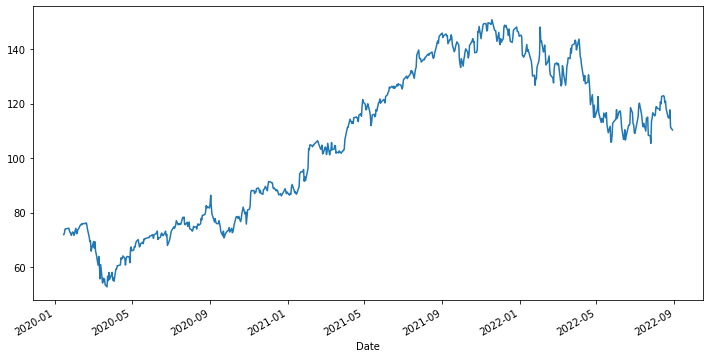

In [43]:
faang_stocks['GOOG']['Close'].plot(figsize=(12,6),label=tick)

<AxesSubplot:xlabel='Date'>

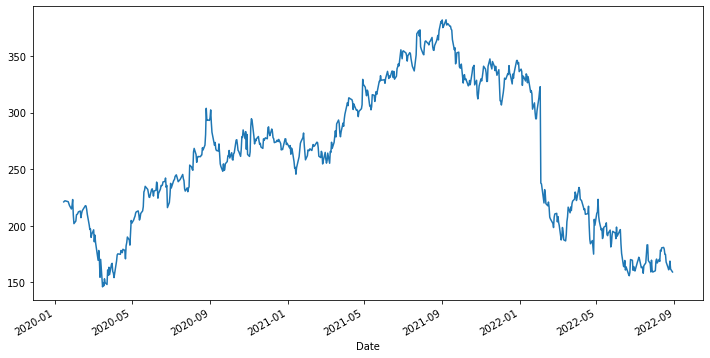

In [45]:
faang_stocks['META']['Close'].plot(figsize=(12,6),label=tick)

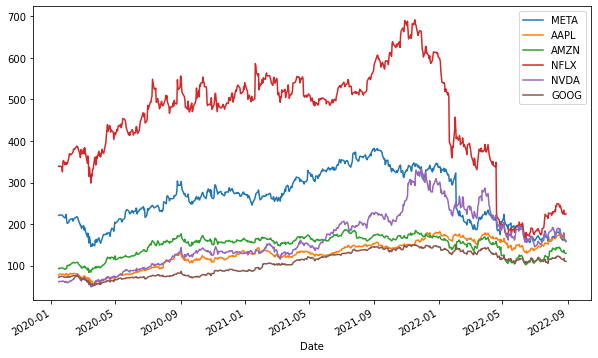

In [48]:
for tick in tickers:
    faang_stocks[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()

In [94]:
#plotly library 
import plotly as py
import cufflinks as cf
cf.go_offline()
faang_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

We can indicate similar behavior in those stocks, and indeed it indicates about unusual incident.
In addition, we can see a big crash in NFLX stock, we will 
check it later in this project!

### Now we will take a look about our stocks returns! 

In [55]:
returns = pd.DataFrame()

In [56]:
for tick in tickers:
    returns[tick+' Return'] = faang_stocks[tick]['Close'].pct_change()
returns.head()

,META Return,AAPL Return,AMZN Return,NFLX Return,NVDA Return,GOOG Return
Date,,,,,,
2020-01-15,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-16,0.002804,0.012526,0.00855,-0.001327,0.013682,0.008685
2020-01-17,0.001668,0.011071,-0.00704,0.003101,0.001406,0.019763
2020-01-21,-0.003151,-0.006777,0.01463,-0.004593,-0.005375,0.002709
2020-01-22,-0.000542,0.003570,-0.00240,-0.035817,0.008752,0.001044


In [59]:
#Worst single day gain.
returns.idxmin()

META Return   2022-02-03
AAPL Return   2020-03-16
AMZN Return   2022-04-29
NFLX Return   2022-04-20
NVDA Return   2020-03-16
GOOG Return   2020-03-16
dtype: datetime64[ns]

Another nice finding is that 3 of 6 stocks had their worst day in 2020-03-16!

In [60]:
#what is the most volatile stock ?
returns.std()

META Return    0.029178
AAPL Return    0.023185
AMZN Return    0.024070
NFLX Return    0.032193
NVDA Return    0.035154
GOOG Return    0.021285
dtype: float64

We can see similar std in those stock, still NVDA is the most volatile, and that's make sense because she is considered as the most 'growth' stock between those stocks.

In [70]:
#How much volatile was the market in the covid crash do u ask ?
returns.loc[start:'2020-04-10'].std()

META Return    0.040488
AAPL Return    0.044751
AMZN Return    0.029942
NFLX Return    0.037607
NVDA Return    0.058472
GOOG Return    0.037079
dtype: float64

Indeed a much bigger std(means more volatile) in those crashing days.

<AxesSubplot:xlabel='META Return', ylabel='Count'>

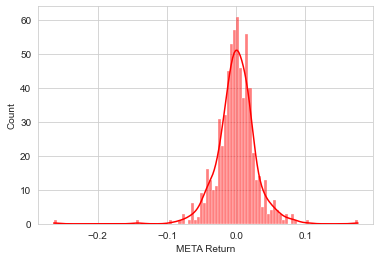

In [90]:
#Whole time returns dist.
sns.histplot(returns.loc[start:end]['META Return'],color='red',bins=100,kde=True)

<AxesSubplot:xlabel='META Return', ylabel='Count'>

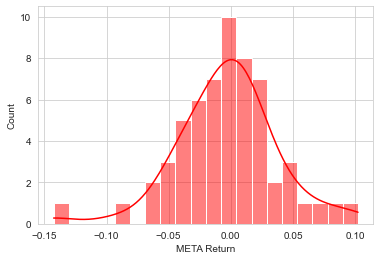

In [89]:
#COVID-19 returns dist.
sns.histplot(returns.loc[start:'2020-04-10']['META Return'],color='red',bins=20,kde=True)

META's returns looks like a classic Normal dist, but we can see that the second graph is way more broader what indicates again about larger volatile.

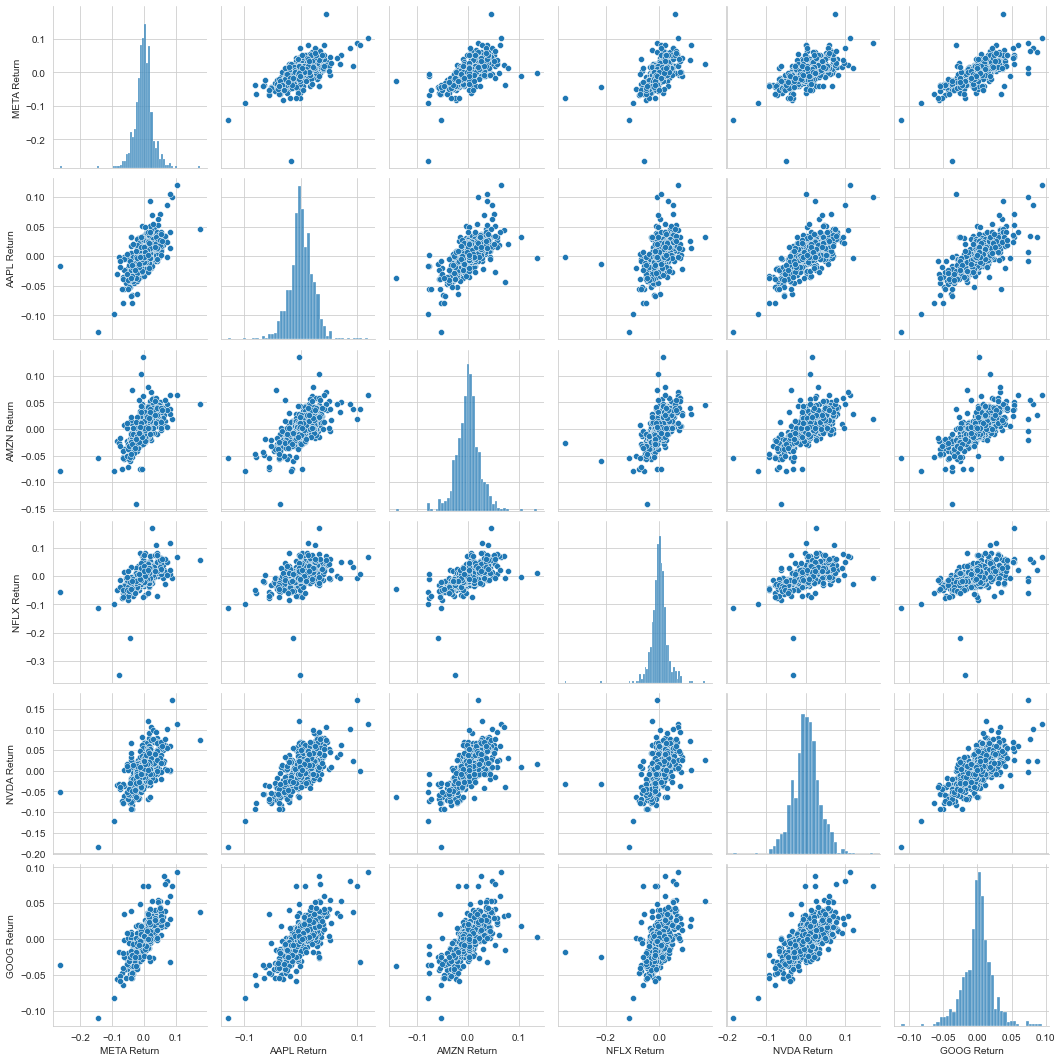

In [93]:
#we can see the whole picture and the cor between every stock in the graph bellow. this graph can tell us a lot and we can 
#see a really strong cor between FAANG stocks!
sns.pairplot(returns)

#### Now we will visualize the correlation better

Text(0.5, 1.0, 'FAANG Correlation')

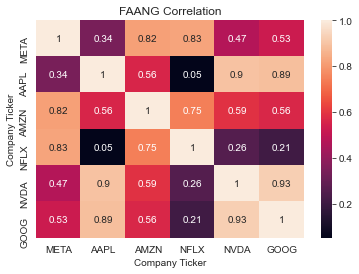

In [101]:
sns.heatmap(faang_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.title('FAANG Correlation')

#### Another way to visualize 

In [102]:
close_corr = faang_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

## Moving Averages

I will plot the rolling 30 day average against the Close Price for AAPL.

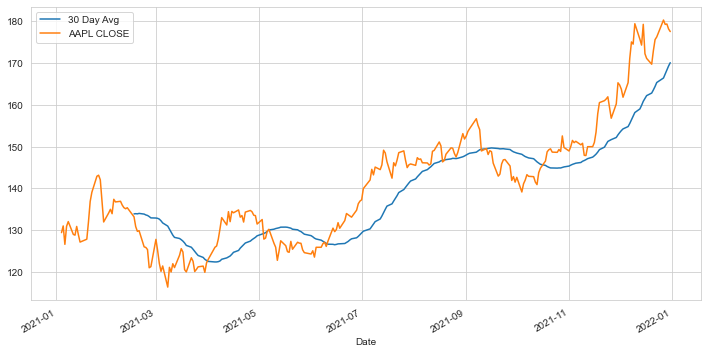

In [95]:
plt.figure(figsize=(12,6))
AAPL['Close'].loc['2021-01-01':'2022-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
AAPL['Close'].loc['2021-01-01':'2022-01-01'].plot(label='AAPL CLOSE')
plt.legend()

We can see that AAPL found a bottom at the start of march 21 and made a massive rally! 
let's find the pct change from the bottom to the top! 

In [99]:
min_price = AAPL['Close'].loc['2021-01-01':'2022-01-01'].min()
max_price = AAPL['Close'].loc['2021-01-01':'2022-01-01'].max()
pct_change = (max_price/min_price)-1
pct_change 

0.5497593750872862

What a decent really AAPL made ! almost 55% change ! 

### Adding more SMA's

In [103]:
AAPL['Close'].loc['2020-01-01':'2022-01-01'].ta_plot(study='sma',periods=[30,100,200],title='Simple Moving Averages')

# Candle sticks plot 

In [105]:
AAPL[['Open', 'High', 'Low', 'Close']].loc['2021-01-01':'2022-01-01'].iplot(kind='candle')

# Boolinger Band indicator 

In [106]:
AAPL['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')

# RSI indicator 

In [109]:
AAPL['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='rsi')

A simple strategy due to those indicators is to buy the stock when the stock is oversold - below the red line in 
the RSI indicator , and whenever the stock touching the lower at the MACD.

I won't dive in further to technical analysis, just showing the skills and the capabilities of those libraries.

# Y Finance library 
this library is very usefull and provide us a lot of information from yahoo-finance. 
let's explore her a little. 

In [110]:
import yfinance as yf 

In [115]:
aapl = yf.Ticker('AAPL')
aapl

yfinance.Ticker object <AAPL>

We can see that now aapl is an object of yfinance.Ticker.
by using the .info method, we can generate a DICT with alot of information about the company.

In [120]:
INFO=aapl.info
INFO

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [118]:
INFO['fullTimeEmployees']

154000

In [121]:
INFO['revenueGrowth']

0.019

In [122]:
INFO['totalCash']

48230998016

In [123]:
INFO['totalDebt']

119691001856

Indeed AAPL is a Cash factory, and also see her debt.
With this package we can generate a lot of information about the stock fundamentals.

#### Let's take a looK about the analysts recommendations

In [125]:
aapl.recommendations.head()

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main


In [127]:
aapl.recommendations['To Grade'].value_counts()

Buy                  322
Outperform           168
Overweight           145
Neutral               87
Hold                  40
Equal-Weight          25
Market Perform        23
Strong Buy             9
Sell                   8
Positive               4
Sector Perform         4
                       3
Market Outperform      3
Sector Weight          2
Sector Outperform      2
Perform                2
Negative               1
Long-Term Buy          1
Underweight            1
Long-term Buy          1
Peer Perform           1
Underperform           1
Reduce                 1
Equal-weight           1
Name: To Grade, dtype: int64

<AxesSubplot:>

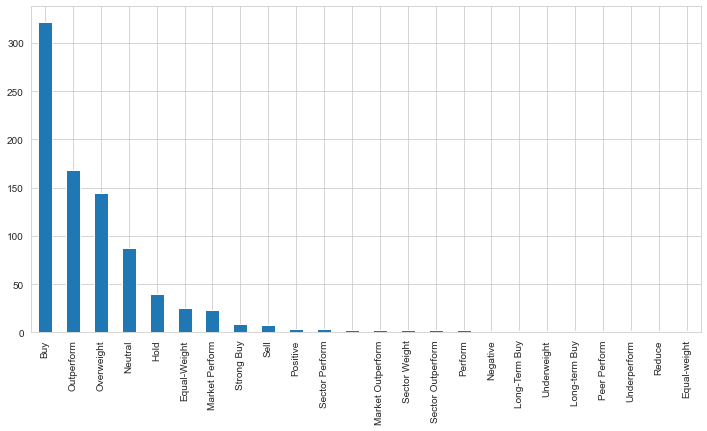

In [126]:
aapl.recommendations['To Grade'].value_counts().plot(figsize=(12,6),kind='bar')

### Now let's compare some stocks fundamentals 

In [135]:
tick = ['AAPL','MSFT','GOOG']
#some main fundamentlas I would like to look for 
fundamentals = ['dividendYield','marketCap','beta','forwardPE']

In [129]:
infos = []
for i in tick : 
    infos.append(yf.Ticker(i).info)

In [184]:
df = pd.DataFrame(infos)

In [185]:
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax
0,95014,Technology,154000,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,...,False,0.0057,1300,162.5600,None,158.91,162.12,https://logo.clearbit.com/apple.com,2.9260,NaN
1,98052-6399,Technology,221000,"Microsoft Corporation develops, licenses, and ...",Redmond,425 882 8080,WA,United States,[],https://www.microsoft.com,...,False,0.0094,1800,267.0500,None,262.97,266.98,https://logo.clearbit.com/microsoft.com,1.9900,425 706 7329
2,94043,Communication Services,174014,Alphabet Inc. provides various products and pl...,Mountain View,650 253 0000,CA,United States,[],https://www.abc.xyz,...,False,NaN,900,111.3483,None,109.91,110.91,https://logo.clearbit.com/abc.xyz,1.5881,NaN


0 1 2 isn't a good name for our index, let's change that.

In [186]:
df = df.set_index('symbol')
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,95014,Technology,154000,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,...,False,0.0057,1300,162.5600,None,158.91,162.12,https://logo.clearbit.com/apple.com,2.9260,NaN
MSFT,98052-6399,Technology,221000,"Microsoft Corporation develops, licenses, and ...",Redmond,425 882 8080,WA,United States,[],https://www.microsoft.com,...,False,0.0094,1800,267.0500,None,262.97,266.98,https://logo.clearbit.com/microsoft.com,1.9900,425 706 7329
GOOG,94043,Communication Services,174014,Alphabet Inc. provides various products and pl...,Mountain View,650 253 0000,CA,United States,[],https://www.abc.xyz,...,False,NaN,900,111.3483,None,109.91,110.91,https://logo.clearbit.com/abc.xyz,1.5881,NaN


In [187]:
len(fundamentals)==df.columns.isin(fundamentals).sum()

True

Great, every fundamental is exists in out DF!

Let's keep exploring.

In [188]:
df[df.columns[df.columns.isin(fundamentals)]]

,beta,forwardPE,marketCap,dividendYield
symbol,,,,
AAPL,1.230174,24.637210,2553811042304,0.0057
MSFT,0.927206,22.024288,1961201238016,0.0094
GOOG,1.078487,18.692177,1427357302784,NaN


We can see that GOOG doesn't share dividend.
Lets change the null to 0.

In [199]:
df.at['GOOG','dividendYield']=0
df[df.columns[df.columns.isin(fundamentals)]]

,beta,forwardPE,marketCap,dividendYield
symbol,,,,
AAPL,1.230174,24.637210,2553811042304,0.0057
MSFT,0.927206,22.024288,1961201238016,0.0094
GOOG,1.078487,18.692177,1427357302784,0.0000


<BarContainer object of 3 artists>

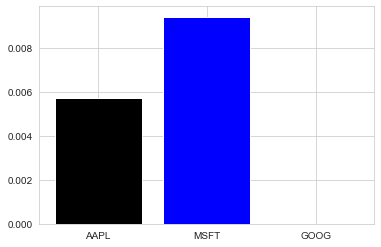

In [200]:
plt.bar(df.index,df['dividendYield'],color=['black','blue'])

# Now let's do the whole process on the NASDAQ100

In [203]:
df_2 = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]

In [206]:
Tickers = df_2.Ticker.to_list()

In [211]:
infos = []
for i in Tickers:
    infos.append(yf.Ticker(i).info)

In [219]:
df_2 = pd.DataFrame(infos)
df_2 = df_2.set_index('symbol')

In [233]:
df_2.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid
symbol,,,,,,,,,,,,,,,,,,,,,
ATVI,90404,Communication Services,9800.0,"Activision Blizzard, Inc., together with its s...",Santa Monica,310 255 2000,CA,United States,[],https://www.activisionblizzard.com,...,78.62,78.88,https://logo.clearbit.com/activisionblizzard.com,4.8947,NaN,NaN,NaN,NaN,NaN,NaN
ADP,07068,Industrials,60000.0,"Automatic Data Processing, Inc. provides cloud...",Roseland,973 974 5000,NJ,United States,[],https://www.adp.com,...,245.59,247.41,https://logo.clearbit.com/adp.com,2.9486,NaN,NaN,NaN,NaN,NaN,NaN
AEP,43215-2373,Utilities,16688.0,"American Electric Power Company, Inc., an elec...",Columbus,614 716 1000,OH,United States,[],https://www.aep.com,...,101.34,102.87,https://logo.clearbit.com/aep.com,3.3895,NaN,NaN,NaN,NaN,NaN,NaN
AMGN,91320-1799,Healthcare,24200.0,"Amgen Inc. discovers, develops, manufactures, ...",Thousand Oaks,805 447 1000,CA,United States,[],https://www.amgen.com,...,239.12,239.38,https://logo.clearbit.com/amgen.com,1.4362,805 447 1010,NaN,NaN,NaN,NaN,NaN
ADI,01887,Technology,24700.0,"Analog Devices, Inc. designs, manufactures, te...",Wilmington,781 935 5565,MA,United States,[],https://www.analog.com,...,152.73,155.90,https://logo.clearbit.com/analog.com,1.4598,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
df_2['dividendYield'].nlargest(5)

symbol
GILD    0.0489
WBA     0.0485
KHC     0.0434
INTC    0.0402
CSCO    0.0335
Name: dividendYield, dtype: float64

In [223]:
# lets drop null's
df_2 = df_2.dropna(subset=['dividendYield'])

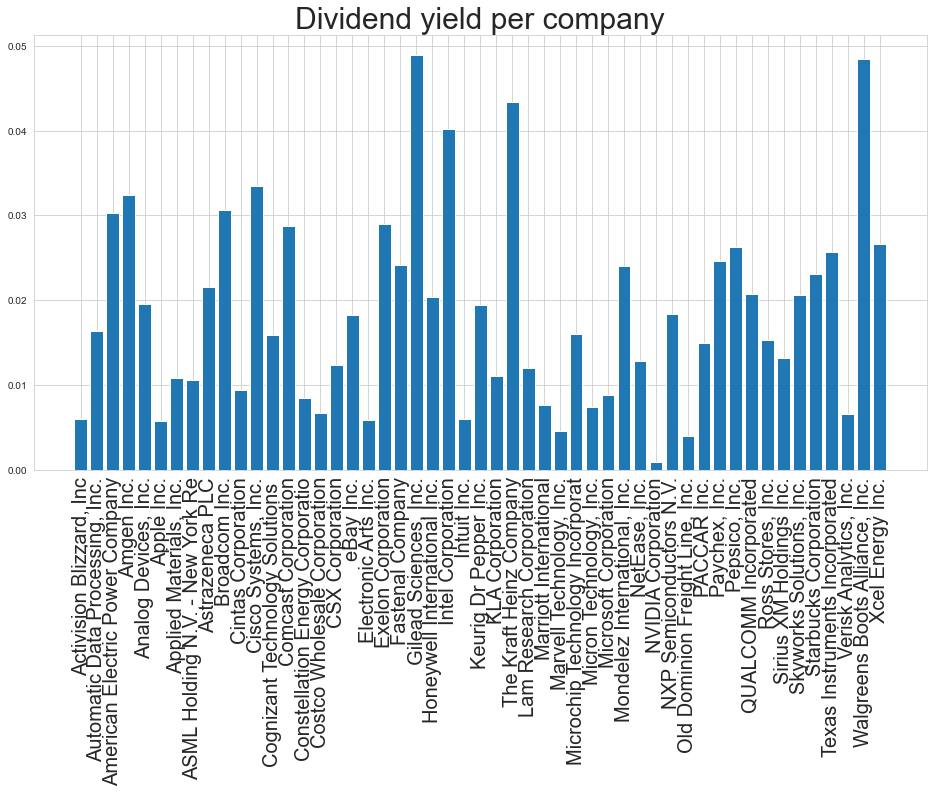

In [265]:
plt.figure(figsize=(16,8))
plt.bar(df_2['shortName'],df_2['dividendYield'])
plt.xticks(fontsize=20,rotation=90)
plt.title('Dividend yield per company',fontsize=30)
plt.show()

In [263]:
sec = df_2.groupby('sector')

<AxesSubplot:title={'center':'Sum of dividends per sector'}, xlabel='sector'>

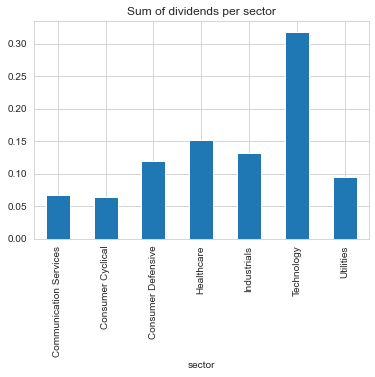

In [266]:
sec['dividendYield'].sum().plot(kind='bar',title='Sum of dividends per sector')

<AxesSubplot:title={'center':'Sum of dividends per sector (NORMALIZED)'}, xlabel='sector'>

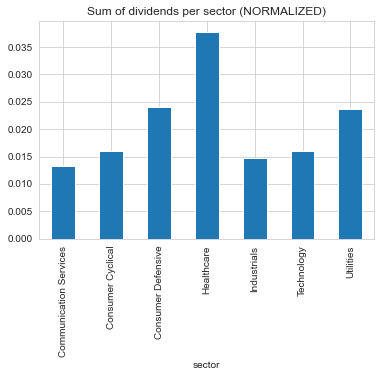

In [268]:
(sec['dividendYield'].sum()/sec.count()['zip']).plot(kind='bar',title='Sum of dividends per sector (NORMALIZED)')